In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from math import sqrt
from matplotlib import pyplot as plt
from sklearn.feature_selection import mutual_info_regression as mireg
from sklearn.feature_selection import RFE

In [2]:
%%time
nms = pd.read_csv('Fulldatasetnomissing.csv')

Wall time: 104 ms


In [3]:
%%time
nms.drop('Unnamed: 0', axis = 1)
y = np.log(nms['totals_transactionRevenue'])

X = nms.drop('totals_transactionRevenue', axis = 1)
X = X.drop('Unnamed: 0', axis = 1)

def encoder(dftemp):
    #print(dftemp.dtypes)
    col_list = list(dftemp.columns)
    #col_list.remove('index')
    for col in col_list:
        if dftemp[col].dtype != 'int64':
            dftemp[col].replace(np.nan, 'NAN', inplace = True)
            dftemp[col] = dftemp[col].astype(str)
            le = preprocessing.LabelEncoder()
            le.fit(dftemp[col])
            dftemp[col] = le.transform(dftemp[col]).reshape(-1, 1)

encoder(X)

dtr = DecisionTreeRegressor(max_depth = None)
adaboost = AdaBoostRegressor(DecisionTreeRegressor(max_depth=None), n_estimators=300, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
dtr.fit(X_train, y_train)
adaboost.fit(X_train, y_train)

Wall time: 30.7 s


In [4]:
%%time
y_1 = dtr.predict(X_train)

print('Score for train data and decision tree ' + str(r2_score(y_train, y_1)))
print('RMSE for train data and decision tree ' + str((mean_squared_error(y_train, y_1))**0.5))


Score for train data and decision tree 0.9999999996819899
RMSE for train data and decision tree 2.123015615547971e-05
Wall time: 9.97 ms


In [5]:
%%time
y_2 = dtr.predict(X_test)

dtrscr = r2_score(y_test, y_2)

dtrrmse = sqrt(mean_squared_error(y_test, y_2))

print('Score for test data and decision tree ' + str(dtrscr))
print('RMSE for test data and decision tree ' + str((mean_squared_error(y_test, y_2))**0.5))

#s=pd.DataFrame(['Actual','Predicted'])
#for Actual,predicted in zip(y_test,y_2):
#    s=s.append({'Actual':Actual,'Predicted':predicted },ignore_index=True)
#s.to_csv("DecisionTreePredicted.csv")

Score for test data and decision tree -0.6259271997219162
RMSE for test data and decision tree 1.5636639201471285
Wall time: 6.98 ms


In [6]:
%%time
y_3 = adaboost.predict(X_train)

print('Score for train data and adaboost ' + str(r2_score(y_train, y_3)))
print('RMSE for train data and adaboost ' + str((mean_squared_error(y_train, y_3))**0.5))

Score for train data and adaboost 0.9999299252781559
RMSE for train data and adaboost 0.009965829655430077
Wall time: 813 ms


In [7]:
%%time
y_4 = adaboost.predict(X_test)

adascr = r2_score(y_test, y_4)

print('Score for test data and adaboost ' + str(adascr))
print('RMSE for test data and adaboost ' + str((mean_squared_error(y_test, y_4))**0.5))
#s=pd.DataFrame(['Actual','Predicted'])
#for Actual,predicted in zip(y_test,y_4):
#    s=s.append({'Actual':Actual,'Predicted':predicted },ignore_index=True)

#s.to_csv("AdaboostPredicted.csv")


Score for test data and adaboost 0.18393423203590475
RMSE for test data and adaboost 1.107784916531838
Wall time: 436 ms


In [8]:
%%time
regr = RandomForestRegressor(max_depth=None, random_state=0, n_estimators=100)
regr.fit(X_train, y_train)

Wall time: 7.59 s


In [9]:
%%time
y_5 = regr.predict(X_train)
print('Score for train data and random forest ' + str(r2_score(y_train, y_5)))
print('RMSE for train data and random forest ' + str((mean_squared_error(y_train, y_5))**0.5))

Score for train data and random forest 0.8881836742400754
RMSE for train data and random forest 0.3980937662305124
Wall time: 234 ms


In [10]:
%%time
y_6 = regr.predict(X_test)

regrscr = r2_score(y_test, y_6)

regrmse = sqrt(mean_squared_error(y_test, y_6))

y_6 = pd.Series(y_6)
temp = pd.Series(y_test)
print('Score for test data and random forest ' + str(regrscr))
print('RMSE for test data and random forest ' + str((mean_squared_error(y_test, y_6))**0.5))

#s=pd.DataFrame(['Actual','Predicted'])
#for Actual,predicted in zip(temp,y_6):
#    s=s.append({'Actual':Actual,'Predicted':predicted },ignore_index=True)
    
#s.to_csv("RandomForestPredicted.csv")


Score for test data and random forest 0.18551722858473385
RMSE for test data and random forest 1.1067099597035583
Wall time: 130 ms


In [11]:

#s=pd.DataFrame(['Actual','Predicted'])
#for Actual,predicted in zip(y_test,y_2):
#    s=s.append({'Actual':Actual,'Predicted':predicted },ignore_index=True)

#s.to_csv("Alizeh.csv")

In [12]:
%%time
#K fold cross validation
cv = KFold(n_splits=5,shuffle = True, random_state=100)
print('Cross validation for decision tree \n')
for train_index, test_index in cv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    dtr.fit(X_train, y_train)
    y_pred = dtr.predict(X_test)
    print("Root Mean Squared Error "+ str((mean_squared_error(y_test, y_pred))**0.5))
    print("\n") 

Cross validation for decision tree 

Root Mean Squared Error 1.5345316889294116


Root Mean Squared Error 1.544574279929131


Root Mean Squared Error 1.5106845912880091


Root Mean Squared Error 1.516762648521617


Root Mean Squared Error 1.5081642207910002


Wall time: 855 ms


In [13]:
%%time
print('Cross validation for adaboost \n')
for train_index, test_index in cv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    adaboost.fit(X_train, y_train)
    y_pred = adaboost.predict(X_test)
    print("Root Mean Squared Error "+ str((mean_squared_error(y_test, y_pred))**0.5))
    print("\n") 
    

Cross validation for adaboost 

Root Mean Squared Error 1.0696491856243742


Root Mean Squared Error 1.079606764362326


Root Mean Squared Error 1.0558193303703334


Root Mean Squared Error 1.0917687368007116


Root Mean Squared Error 1.0849358465481973


Wall time: 3min 11s


In [14]:
%%time
print('Cross validation for random forest \n')
for train_index, test_index in cv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    print("Root Mean Squared Error "+ str((mean_squared_error(y_test, y_pred))**0.5))
    print("\n") 

Cross validation for random forest 

Root Mean Squared Error 1.0674262090028488


Root Mean Squared Error 1.0700264292219717


Root Mean Squared Error 1.0512169375692975


Root Mean Squared Error 1.088019455002016


Root Mean Squared Error 1.0851351651567305


Wall time: 46.4 s


In [15]:
#scores = []
#rmse = []
#models = ['Decision Tree', 'Adaboost', 'Random Forest']

In [16]:
#scores.append(dtrscr)
#scores.append(adascr)
#scores.append(regrscr)

In [17]:
#rmse.append(dtrrmse)
#rmse.append(adarmse)
#rmse.append(regrmse)

In [18]:
dtr_ft = np.array(dtr.feature_importances_)
dtr_ft[dtr_ft>0.0005]

array([0.0166632 , 0.04525049, 0.01281966, 0.01097315, 0.01279299,
       0.02831635, 0.09077393, 0.04998787, 0.00340856, 0.00779424,
       0.02743623, 0.05582828, 0.02234184, 0.00439857, 0.09873496,
       0.17482706, 0.00408068, 0.0748093 , 0.00112287, 0.0102822 ,
       0.00218248, 0.01031534, 0.00505205, 0.01408311, 0.00468442,
       0.00071086, 0.06005641, 0.07997913, 0.0695786 ])

In [19]:
col = X.columns

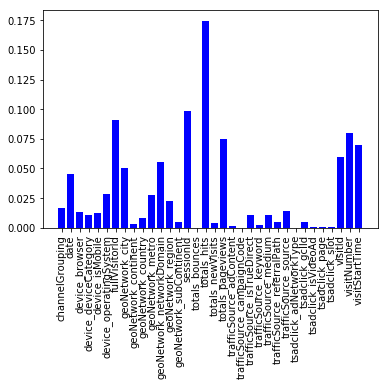

In [20]:
fig, ax = plt.subplots()
plt.xticks(rotation='vertical')
rects1 = ax.bar(col, dtr.feature_importances_,color='b', error_kw={'ecolor': '0.3'})

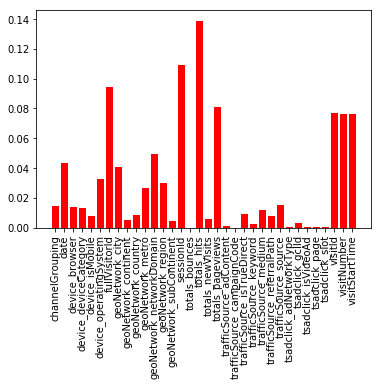

In [21]:
fig, ax = plt.subplots()
plt.xticks(rotation='vertical')
rects1 = ax.bar(col, adaboost.feature_importances_,color='r', error_kw={'ecolor': '0.3'})


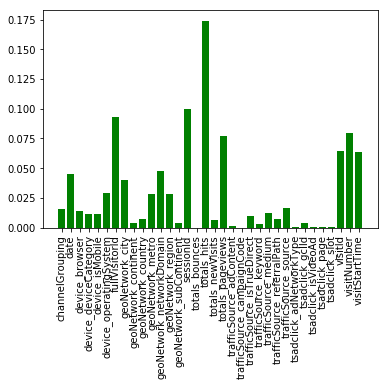

In [22]:
fig, ax = plt.subplots()
plt.xticks(rotation='vertical')
rects1 = ax.bar(col, regr.feature_importances_,color='g', error_kw={'ecolor': '0.3'})